In [10]:
# importing required libraries
import os, sys
sys.path.append(os.path.abspath("../../"))
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Simple learners
1. Choose at least one regression model that provides feature importances. Examples: linear regression, decision tree, random forest, boosted trees.
1. Taking into account the model and the dataset, preprocess the data if needed.

In [15]:
import matplotlib.pyplot as plt
# preprocess the data and create the dataframe
np_data = np.load('jobs.npz')
# to see the number of columns in the give dataset
print(np_data.files)


df1 = pd.DataFrame(data=np_data['x'])
df2 = pd.DataFrame(data=np_data['t'])
df3 = pd.DataFrame(data=np_data['y'])
df4 = pd.DataFrame(data=np_data['e'])

frames = [df2, df3, df4, df1]
  
data = pd.concat(frames, axis=1, join='inner')

col =  ["treatment", "y" , "e",]

for i in range(1,18):
    col.append("x"+str(i))
data.columns = col

data.head()


['x', 't', 'y', 'e']


,treatment,y,e,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17
0,0,1,0,-0.614282,1.464727,0.0,0.0,1.0,0.0,2.393250,2.746196,-0.653311,-0.656913,1.627531,2.462337,2.937244,0.0,0.0,2.843909,0.0
1,0,1,0,-0.802463,0.101835,0.0,0.0,1.0,0.0,0.109885,0.498271,-0.785284,-0.743407,-0.022502,-0.177193,0.082537,0.0,0.0,0.038422,0.0
2,0,1,0,-0.896553,-0.238888,1.0,0.0,1.0,1.0,-0.085212,-0.148097,-0.847312,-0.781606,-0.361348,-0.286221,-0.303615,0.0,0.0,-0.191304,0.0
3,0,1,1,-0.896553,-0.238888,0.0,0.0,0.0,1.0,0.405581,0.325594,-0.847312,-0.781606,-0.361348,0.023020,-0.039630,0.0,0.0,0.173108,0.0
4,0,1,0,0.138440,-1.601779,1.0,0.0,1.0,1.0,-0.722531,-0.212734,-0.019840,-0.156019,-1.422084,-0.514563,-0.331552,0.0,0.0,-0.779227,0.0


In [16]:
# Preprocess the data and remove all the Nan and Null values
print(data.shape)
from sklearn.model_selection import train_test_split
data = data.dropna()


# # Remove the duplication data from pandas dataframe
data = data.drop_duplicates()
print(data.shape)

(3212, 20)
(3007, 20)


In [25]:
# Preprocess the data and remove all the Nan and Null values
from sklearn.model_selection import train_test_split
data = data.dropna()
data.shape

# # Remove the duplication data from pandas dataframe
# data = data.drop_duplicates()
# data.shape

# Split data into train and test
train, test =  train_test_split(data, test_size=0.2, random_state=0)

IHDF_data = ['y_factual', 'y_cfactual', 'ite']
JOBS_data = ["y" , "e",]

def seprate_X_y(data): 
    X = data.drop(JOBS_data, axis=1)
    y = data['y']
    return X, y

(b) Train the model(s) of your choice on both datasets using all available features (including
treatment ).

In [26]:

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
# seprate y_factual and dependent variable.

X_train, y_train = seprate_X_y(train)
X_test, y_test = seprate_X_y(test)

model = RandomForestRegressor()
results = model.fit(X_train, y_train)
print(f'model score on training data: {model.score(X_train, y_train)}')
print(f'model score on testing data: {model.score(X_test, y_test)}')



model score on training data: 0.8488029523624341
model score on testing data: 0.124570128924684


 Make effect predictions and compute relevant metrics. <br>
c. Make predictions yˆ1 and yˆ0 by setting treatment to 1 and 0 respectively. Obtain effect estimates as yˆ1 − yˆ0.

In [27]:

# Force the data to change the treatment variable to see the effect

# make treatment 0 
X_test_t0 = X_test.copy()
X_test_t0['treatment'] = X_test_t0['treatment'].replace(0, 1)
# make treatment 1
X_test_t1 = X_test.copy()
X_test_t1['treatment'] = X_test_t1['treatment'].replace(1, 0)

y0 = model.score(X_test_t0, y_test)
y1 = model.score(X_test_t1, y_test)
# Task 3

effect_estimation = y1 - y0
print(effect_estimation)

0.13254490362339633


d) Perform hyperparameter optimisation for your model(s) using grid search and appropriate modeling techniques.

In [ ]:
# Take too much time
from sklearn.model_selection import RepeatedKFold, RandomizedSearchCV, GridSearchCV
from scipy.stats import loguniform

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define search space
space = dict()
# Number of trees in random forest
space['n_estimators'] = [300, 400]
# Number of features to consider at every split
# Maximum number of levels in tree
# space['max_depth'] = [int(x) for x in np.linspace(10, 110, num = 11)]
space['max_depth'] = [10, 20, 30]
# Minimum number of samples required to split a node
space['min_samples_split'] = [2, 5, 10]
space['min_samples_leaf'] = [1, 2, 4]
space['bootstrap'] = [True, False]

# define search
search = RandomizedSearchCV(model, space, n_iter=100, scoring='neg_mean_absolute_error', n_jobs=-1, cv=cv, random_state=1)
# execute search
result = search.fit(X_test, y_test)
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)
#  Score
# Best Score: -0.8080402186715367
# Best Hyperparameters: {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 30, 'bootstrap': True}

e) Report the performance (chosen metric(s)) of your model(s) using 10-fold cross-validation or a training/validation/test split.

In [29]:
from sklearn.metrics import mean_squared_error
n = len(test)
# convert the dataframe to numpy interger values
Ytrue_1 = (test['treatment'] == 1) * 1
Ytrue_0 = (test['treatment'] == 0) * 1

y_pred_0 = model.predict(X_test_t0)
y_pred_1 = model.predict(X_test_t1)


ATE = ((sum(y_pred_1 - y_pred_0))/n) - ((sum(Ytrue_1 - Ytrue_0))/n)
print(f'Average Treatment Effect: {ATE}')


Average Treatment Effect: 0.7602293940832147


Plot feature importances and briefly comment on them.

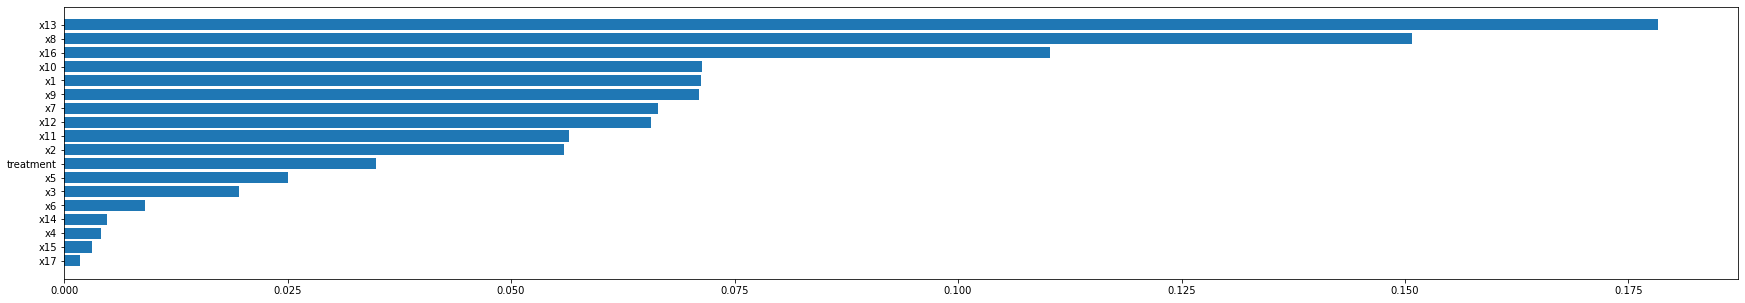

In [30]:
importances = model.feature_importances_
indices = np.argsort(importances)

fig, ax = plt.subplots()
ax.barh(range(len(importances)), importances[indices])
ax.set_yticks(range(len(importances)))
_ = ax.set_yticklabels(np.array(X_train.columns)[indices])

# Propensity score re-weighting <br>
(a) Train a classifier (of your choice) to predict propensity scores based on background features X. See section 5.1 for more details.


In [31]:

from sklearn.linear_model import LogisticRegression
# seprate y_factual and dependent variable.

treatment = X_train['treatment']
X_confounders = X_train.drop(['treatment'], axis=1)

model = LogisticRegression()
results = model.fit(X_confounders, treatment)
propensity_scores = model.predict_proba(X_confounders)
propensity_scores.shape

# Calculate the inverse propensity score weighting
def inverse_propensity_score_weight(treatment, probability):
    
    w = ((treatment / probability)) + ((1 - treatment) / (1 - probability))
    
    return w

w = inverse_propensity_score_weight(treatment, propensity_scores[:, 1])


(c) Use the weights returned by the function as the sample weights to train a weighted regressor (use the regressor(s) chosen in task 3)

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
# seprate y_factual and dependent variable.

weighted_model = RandomForestRegressor()
weighted_model.fit(X_train, y_train, sample_weight=w)
print(f'model score on testing data: {weighted_model.score(X_test, y_test)}')

model score on testing data: 0.13535079540388695


### Hyperparameter optimization
Repeat steps 3d - 3f, but for weighted regression.

In [ ]:
from sklearn.model_selection import RepeatedKFold, RandomizedSearchCV, GridSearchCV
from scipy.stats import loguniform

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define search space
space = dict()
# Number of trees in random forest
space['n_estimators'] = [300, 400]
# Number of features to consider at every split
# Maximum number of levels in tree
# space['max_depth'] = [int(x) for x in np.linspace(10, 110, num = 11)]
space['max_depth'] = [10, 20, 30]
# Minimum number of samples required to split a node
space['min_samples_split'] = [2, 5, 10]
space['min_samples_leaf'] = [1, 2, 4]
space['bootstrap'] = [True, False]

# define search
search = RandomizedSearchCV(weighted_model, space, n_iter=100, scoring='neg_mean_absolute_error', n_jobs=-1, cv=cv, random_state=1)
# execute search
result = search.fit(X_test, y_test)
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

• How about evaluation metrics? Do you observe any significant differences there when compared to simple learners from task 3?

In [33]:
n = len(test)
# convert the dataframe to numpy interger values
Ytrue_1 = (test['treatment'] == 1) * 1
Ytrue_0 = (test['treatment'] == 0) * 1

y_pred_0 = weighted_model.predict(X_test_t0)
y_pred_1 = weighted_model.predict(X_test_t1)

# Base on equation(6) provied in the report
ATE = ((sum(y_pred_1 - y_pred_0))/n) - ((sum(Ytrue_1 - Ytrue_0))/n)
print(f'Average Treatment Effect: {ATE}')


Average Treatment Effect: 0.7441942071402204


In [34]:
from econml.dml import LinearDML

# Use defaults
est = LinearDML()
est.fit(y_train, treatment, X=X_confounders)


Error in sys.excepthook:
Traceback (most recent call last):
  File "/Users/ammar/Library/Python/3.8/lib/python/site-packages/IPython/core/interactiveshell.py", line 1934, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'RuntimeError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/ammar/Library/Python/3.8/lib/python/site-packages/IPython/core/interactiveshell.py", line 1936, in showtraceback
    stb = self.InteractiveTB.structured_traceback(etype,
  File "/Users/ammar/Library/Python/3.8/lib/python/site-packages/IPython/core/ultratb.py", line 1105, in structured_traceback
    return FormattedTB.structured_traceback(
  File "/Users/ammar/Library/Python/3.8/lib/python/site-packages/IPython/core/ultratb.py", line 999, in structured_traceback
    return VerboseTB.structured_traceback(
  File "/Users/ammar/Library/Python/3.8/lib/python/site-packages/IPyth

In [36]:
X_test_confounders = X_test.drop(['treatment'], axis=1)
# Get the effect inference summary, which includes the standard error, z test score, p value, and confidence interval given each sample X[i]
est.effect_inference(X_test_confounders).summary_frame(alpha=0.05, value=0, decimals=3)
# # Get the population summary for the entire sample X
est.effect_inference(X_test_confounders).population_summary(alpha=0.1, value=0, decimals=3, tol=0.001)
# #  Get the parameter inference summary for the final model
est.summary()

,point_estimate,stderr,zstat,pvalue,ci_lower,ci_upper
x1,-2.616,1.415,-1.849,0.064,-5.389,0.157
x2,-0.484,0.24,-2.015,0.044,-0.955,-0.013
x3,-0.154,0.079,-1.956,0.05,-0.308,0.0
x4,-0.258,0.12,-2.152,0.031,-0.493,-0.023
x5,0.188,0.078,2.416,0.016,0.036,0.341
x6,0.074,0.109,0.683,0.495,-0.139,0.287
x7,0.706,0.225,3.138,0.002,0.265,1.146
x8,-0.326,0.168,-1.934,0.053,-0.656,0.004
x9,5.869,3.209,1.829,0.067,-0.421,12.159
x10,-3.274,1.849,-1.771,0.077,-6.897,0.349


# Advanced CATE estimators

In [40]:
import econml
import dowhy
from dowhy import CausalModel


cacual_model = CausalModel(
        data = train,
        treatment='treatment',
        outcome='y',
        common_causes=["x"+str(i) for  i in range(1,26)]
        )

#Identify the causal effect
identified_estimand = cacual_model.identify_effect(proceed_when_unidentifiable=True, method_name="default")
print(identified_estimand)


Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
     d                                                                        
────────────(Expectation(y|x3,x16,x5,x10,x12,x7,x6,x4,x14,x8,x13,x11,x9,x2,x1,
d[treatment]                                                                  

         
x17,x15))
         
Estimand assumption 1, Unconfoundedness: If U→{treatment} and U→y then P(y|treatment,x3,x16,x5,x10,x12,x7,x6,x4,x14,x8,x13,x11,x9,x2,x1,x17,x15,U) = P(y|treatment,x3,x16,x5,x10,x12,x7,x6,x4,x14,x8,x13,x11,x9,x2,x1,x17,x15)

### Estimand : 2
Estimand name: iv
No such variable found!

### Estimand : 3
Estimand name: frontdoor
No such variable found!



In [41]:
# Estimate the causal effect and compare it with Average Treatment Effect
estimate = cacual_model.estimate_effect(identified_estimand,
        method_name="backdoor.linear_regression", test_significance=True)
print(estimate)

print("Causal Estimate is " + str(estimate.value))
data_1 = test[test["treatment"]==1]
data_0 = test[test["treatment"]==0]

print("ATE", np.mean(data_1["y"])- np.mean(data_0["y"]))

*** Causal Estimate ***

## Identified estimand
Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
     d                                                                        
────────────(Expectation(y|x3,x16,x5,x10,x12,x7,x6,x4,x14,x8,x13,x11,x9,x2,x1,
d[treatment]                                                                  

         
x17,x15))
         
Estimand assumption 1, Unconfoundedness: If U→{treatment} and U→y then P(y|treatment,x3,x16,x5,x10,x12,x7,x6,x4,x14,x8,x13,x11,x9,x2,x1,x17,x15,U) = P(y|treatment,x3,x16,x5,x10,x12,x7,x6,x4,x14,x8,x13,x11,x9,x2,x1,x17,x15)

## Realized estimand
b: y~treatment+x3+x16+x5+x10+x12+x7+x6+x4+x14+x8+x13+x11+x9+x2+x1+x17+x15
Target units: ate

## Estimate
Mean value: 0.06862186846889118
p-value: [0.00573875]

Causal Estimate is 0.06862186846889118
ATE -0.06929600371747213
